In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data cleaning

In [3]:
spotify_data = pd.read_csv("./artists.csv", encoding='utf-8')

In [4]:
import charset_normalizer
with open("./artists.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
    
print(result)

{'encoding': 'utf-8', 'language': 'English', 'confidence': 0.9654}


In [5]:
np.random.seed(66)

In [6]:
spotify_data.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"


## Check data type of each column

In [7]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


## Handle missing value of each column

In [8]:
# To get the number of missing data points per column
missing_values_cnt = spotify_data.isnull().sum()

In [9]:
missing_values_cnt[0:]

Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64

In [10]:
total_cells = np.product(spotify_data.shape)
total_missing = missing_values_cnt.sum()

percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

2.3833333333333333


In [11]:
spotify_data_c = spotify_data.copy()

In [12]:
spotify_data_c.fillna(0)

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
...,...,...,...,...,...,...
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,0


In [13]:
spotify_data_c = spotify_data_c.fillna(method='bfill', axis=0).fillna(0)

In [14]:
spotify_data_c

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
...,...,...,...,...,...,...
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,310.1


In [15]:
# To make sure the NAN is replaced
spotify_data_c.isnull().sum()

Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64

## Replace the special symbols in `Artist` column

In [16]:
spotify_data_c['Artist'] = spotify_data_c['Artist'].str.lower()
spotify_data_c['Artist'] = spotify_data_c['Artist'].str.strip()

spotify_data_c['Artist'] = spotify_data_c['Artist'].str.replace(r'\$', '', regex=True)

In [17]:
artists = spotify_data_c['Artist'].unique()

artists.sort()
artists.size
# artists

2998

In [18]:
spotify_data_c['Artist'].duplicated().sum()

2

## Convert data type

In [19]:
columns_to_convert = ['Streams', 'As lead', 'Solo', 'As feature']

for column in columns_to_convert:
    spotify_data_c[column] = spotify_data_c[column].str.replace(',', '').astype('float64')

# Check data types
print(spotify_data_c.dtypes)

Artist         object
Streams       float64
Daily         float64
As lead       float64
Solo          float64
As feature    float64
dtype: object


## Merge duplicated rows (`Artist` duplicated)

In [20]:
def custom_agg(series):
    if series.dtype == 'float64' or series.dtype == 'int64':
        return series.sum()
    else:
        return series.iloc[0]

agg_dict = {
    'Streams': 'sum',
    'Daily': 'sum',
    'As lead': 'sum',
    'Solo': 'sum',
    'As feature': 'sum'
}

spotify_data_c = spotify_data_c.groupby('Artist').agg(agg_dict).reset_index()


In [21]:
spotify_data_c['Artist'].duplicated().sum()

0

In [22]:
spotify_data_c.shape

(2998, 6)

In [23]:
# import sys
# print(sys.executable)

In [24]:
# !{sys.executable} -m pip install fuzzywuzzy

In [25]:
#!{sys.executable} -m pip install seaborn

In [26]:
spotify_data_c.sort_values(by='Streams', ascending=False).reset_index()

,index,Artist,Streams,Daily,As lead,Solo,As feature
0,748,drake,85041.3,50.775,57252.6,32681.6,27788.7
1,230,bad bunny,67533.0,44.820,40969.6,23073.0,26563.4
2,2595,taylor swift,57859.0,85.793,55566.7,50425.7,2292.4
3,2691,the weeknd,53665.2,44.437,42673.3,31164.2,10991.9
4,785,ed sheeran,47907.7,17.506,42767.9,33917.0,5139.8
...,...,...,...,...,...,...,...
2993,1722,majestic,729.9,0.489,625.0,37.9,104.9
2994,2908,yasin,729.6,0.573,645.9,542.0,83.6
2995,2821,vedo,729.4,0.284,718.2,607.6,11.1
2996,1448,kings of convenience,728.6,0.252,728.6,618.9,310.1


# Data visualization

C:\Users\12195\AppData\Local\Temp\ipykernel_360\1355024161.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Proportion of Solo Streams')


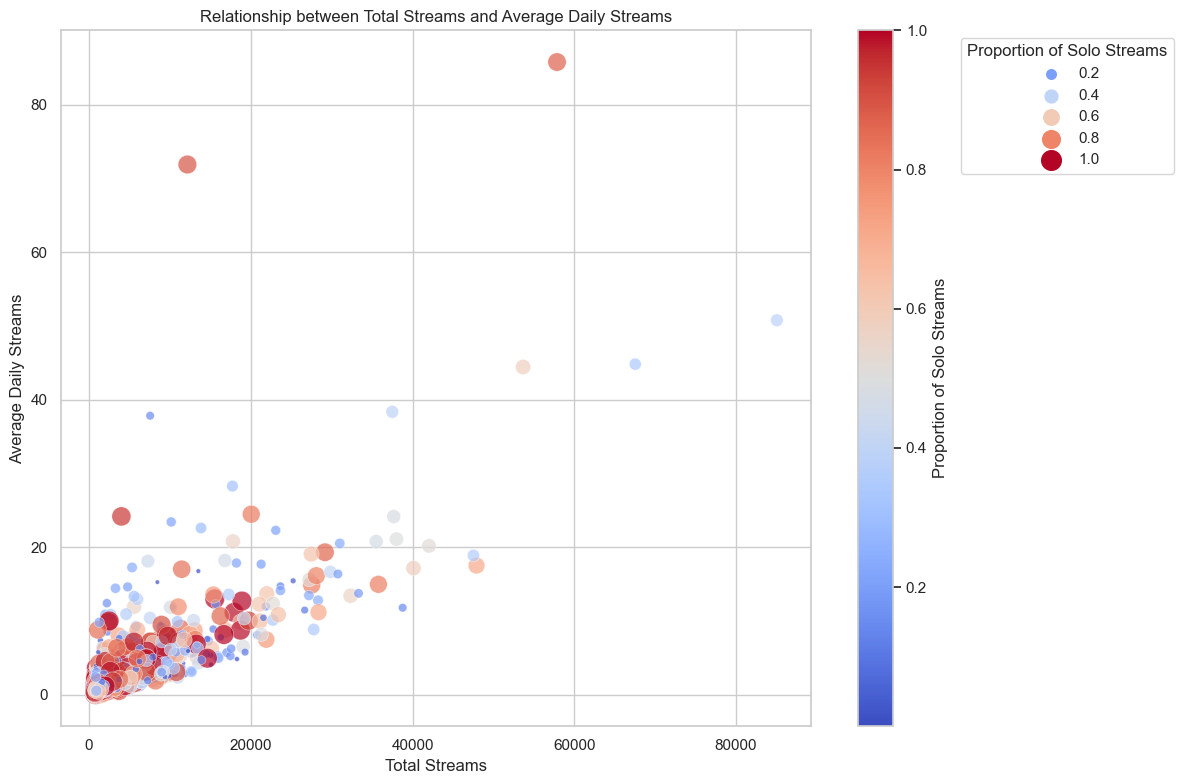

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

solo_proportion = spotify_data_c['Solo'] / spotify_data_c['Streams']

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=spotify_data_c, x='Streams', y='Daily', 
                     hue=solo_proportion, 
                     palette='coolwarm', 
                     size=solo_proportion, 
                     sizes=(10, 200), 
                     alpha=0.7)

norm = plt.Normalize(solo_proportion.min(), solo_proportion.max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

plt.colorbar(sm, label='Proportion of Solo Streams')

plt.title('Relationship between Total Streams and Average Daily Streams')
plt.xlabel('Total Streams')
plt.ylabel('Average Daily Streams')

ax.legend(title='Proportion of Solo Streams', loc='upper left', bbox_to_anchor=(1.19, 1))

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Load the data
file_path = './artists.csv'
artists_data = pd.read_csv(file_path)

artists_data['Streams'] = artists_data['Streams'].str.replace(',', '').astype(float)
artists_data['As lead'] = artists_data['As lead'].str.replace(',', '').astype(float)
artists_data['Solo'] = artists_data['Solo'].str.replace(',', '').astype(float)
artists_data['As feature'] = artists_data['As feature'].str.replace(',', '').astype(float)

contains_comma = artists_data['Daily'].astype(str).str.contains(',').any()
if contains_comma:
    artists_data['Daily'] = artists_data['Daily'].str.replace(',', '').astype(float)
else:
    artists_data['Daily'] = artists_data['Daily'].astype(float)

print(artists_data.info())
print(artists_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   float64
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   float64
 4   Solo        2931 non-null   float64
 5   As feature  2662 non-null   float64
dtypes: float64(5), object(1)
memory usage: 140.8+ KB
None
         Artist  Streams   Daily  As lead     Solo  As feature
0         Drake  85041.3  50.775  57252.6  32681.6     27788.7
1     Bad Bunny  67533.0  44.820  40969.6  23073.0     26563.4
2  Taylor Swift  57859.0  85.793  55566.7  50425.7      2292.4
3    The Weeknd  53665.2  44.437  42673.3  31164.2     10991.9
4    Ed Sheeran  47907.7  17.506  42767.9  33917.0      5139.8


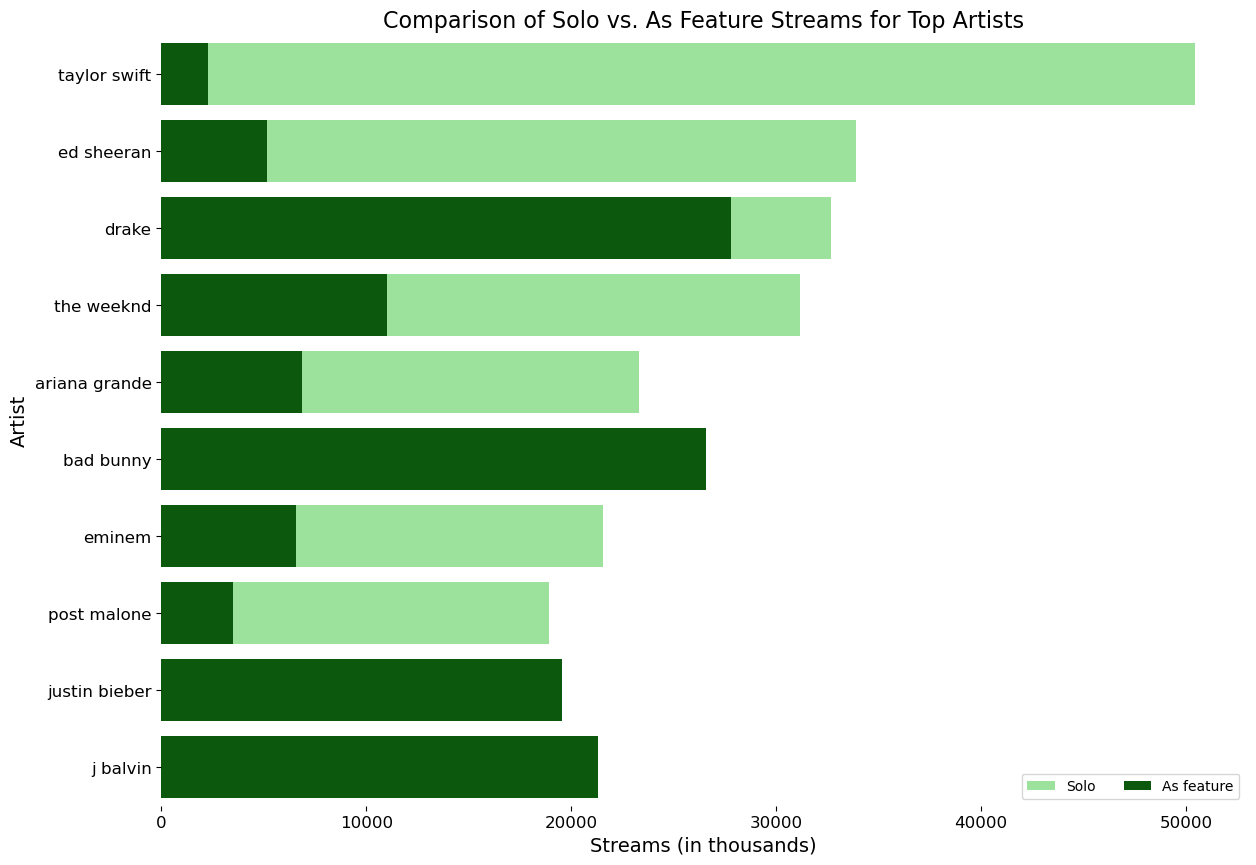

In [37]:
top_artists_combined = top_artists[['Artist', 'Solo', 'As feature']]

plt.figure(figsize=(14, 10))

sns.barplot(x='Solo', y='Artist', data=top_artists_combined, color='lightgreen', label='Solo', order=top_artists_combined.sort_values('Solo', ascending=False)['Artist'])

sns.barplot(x='As feature', y='Artist', data=top_artists_combined, color='darkgreen', label='As feature', order=top_artists_combined.sort_values('Solo', ascending=False)['Artist'])

plt.legend(ncol=2, loc="lower right", frameon=True)

plt.title('Comparison of Solo vs. As Feature Streams for Top Artists', fontsize=16)
plt.xlabel('Streams (in thousands)', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)

plt.show()

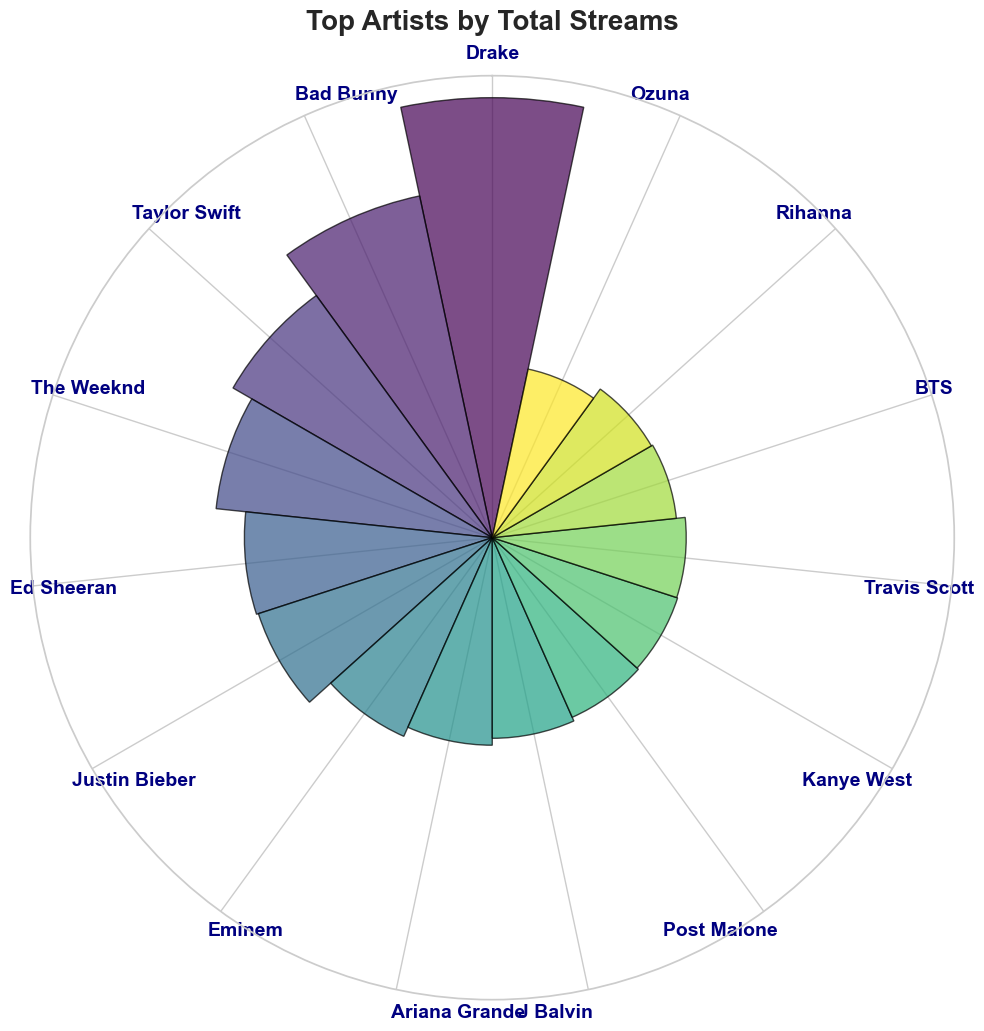

In [45]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

normalized = (top_artists_radial['Streams'] / top_artists_radial['Streams'].max()) * (2 * np.pi)

for idx, (angle, radius) in enumerate(zip(theta, normalized)):
    ax.bar(angle, radius, width=width, color=colors[idx], edgecolor='black', alpha=0.7)

ax.set_xticks(theta)
ax.set_xticklabels(labels, fontsize=14, fontweight='bold', color='navy', ha='right')

ax.set_theta_zero_location('N')

for label, angle in zip(ax.get_xticklabels(), theta):
    if angle in [0, np.pi]:
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

ax.set_yticklabels([])
ax.yaxis.grid(False)

plt.title('Top Artists by Total Streams', fontsize=20, fontweight='bold', va='bottom')

plt.show()